In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
transaction = pd.read_csv('/content/drive/MyDrive/AML_assignment_2/data_transaction.csv')

In [4]:
identity = pd.read_csv('/content/drive/MyDrive/AML_assignment_2/data_identity.csv')

In [5]:
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']

In [6]:
len(cat_cols)

55

In [7]:
#!pip3 install pandas-profiling

In [8]:
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


### Join tables 

In [9]:
data = transaction.set_index('TransactionID').join(identity.set_index('TransactionID'))
data = data[:200000]


In [10]:
del transaction
del identity

In [11]:
data.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### Drop columns with more than 30% Nan-values and data with a lot of unique values

In [12]:
nan_columns=[]
for column in data.columns:
  if data[column].isna().sum()/data.shape[0] >= 0.3:
    nan_columns.append(column)



In [13]:
data.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,200000.000000,2.000000e+05,200000.000000,200000.000000,196974.000000,199997.000000,198933.000000,178608.000000,178608.000000,68366.000000,...,67866.000000,21618.000000,67853.000000,67846.000000,2560.000000,2564.000000,2384.000000,2552.000000,2563.000000,46775.000000
mean,0.030120,2.143828e+06,129.828889,9863.299370,367.834450,153.307935,200.397968,291.099357,86.600589,127.048723,...,181.516533,14.079286,357.042297,390.724449,367.680078,15.418877,12.934144,326.349138,148.611783,26.730005
std,0.170918,1.211275e+06,207.672259,4914.176565,158.879956,11.440031,40.543277,102.160483,3.782374,387.707639,...,27.748366,1.480754,144.609488,153.497508,195.705261,5.865980,2.180740,94.930600,31.668035,3.810351
min,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,100.000000,11.000000,100.000000,100.000000,100.000000,12.000000,11.000000,100.000000,100.000000,0.000000
25%,0.000000,1.189346e+06,43.925000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,0.000000,2.006390e+06,74.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,9.000000,...,166.000000,15.000000,348.000000,401.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,0.000000,3.093420e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,26.000000,...,225.000000,15.000000,454.000000,521.000000,499.250000,14.000000,15.000000,356.000000,169.000000,32.000000
max,1.000000,4.556419e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,7068.000000,...,229.000000,29.000000,671.000000,660.000000,854.000000,41.000000,25.000000,548.000000,216.000000,32.000000


Number of columns which contains more than 30% of Nans equals to 232.

In [14]:
len(nan_columns)

252

Drop columns

In [15]:
data.drop(nan_columns, axis=1, inplace=True)


In [16]:
cat_feat=[]
for column in data.columns:
  if column in cat_cols and len(data[column].unique())>5:
    
    data.drop(column,axis=1,inplace=True)
  elif column in cat_cols and len(data[column].unique())<=5:
    cat_feat.append(column)


In [17]:
data.describe()

,isFraud,TransactionDT,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,199989.000000,200000.000000,200000.000000,200000.000000,199989.000000,199989.000000,199989.000000,199989.000000,199989.000000,199989.000000
mean,0.030120,2.143828e+06,129.828889,24.052410,27.243595,0.008070,9.831040,4.629565,14.201565,7.834240,...,31.132141,17.598772,35.014557,22.125043,25.484676,104.561727,50.226600,13.726718,24.380753,17.304597
std,0.170918,1.211275e+06,207.672259,220.026042,256.071969,0.151476,111.723657,23.071489,113.169659,105.810451,...,121.520430,85.046172,151.779411,101.250123,218.160529,1486.225101,479.115646,296.513182,326.636787,305.580338
min,0.000000,8.640000e+04,0.292000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.189346e+06,43.925000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.006390e+06,74.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.093420e+06,125.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.556419e+06,5278.950000,4685.000000,5691.000000,18.000000,2253.000000,349.000000,2253.000000,2255.000000,...,4015.899902,4079.939941,6159.890137,4079.939941,12000.000000,86715.960938,26837.498047,101640.000000,101640.000000,101640.000000


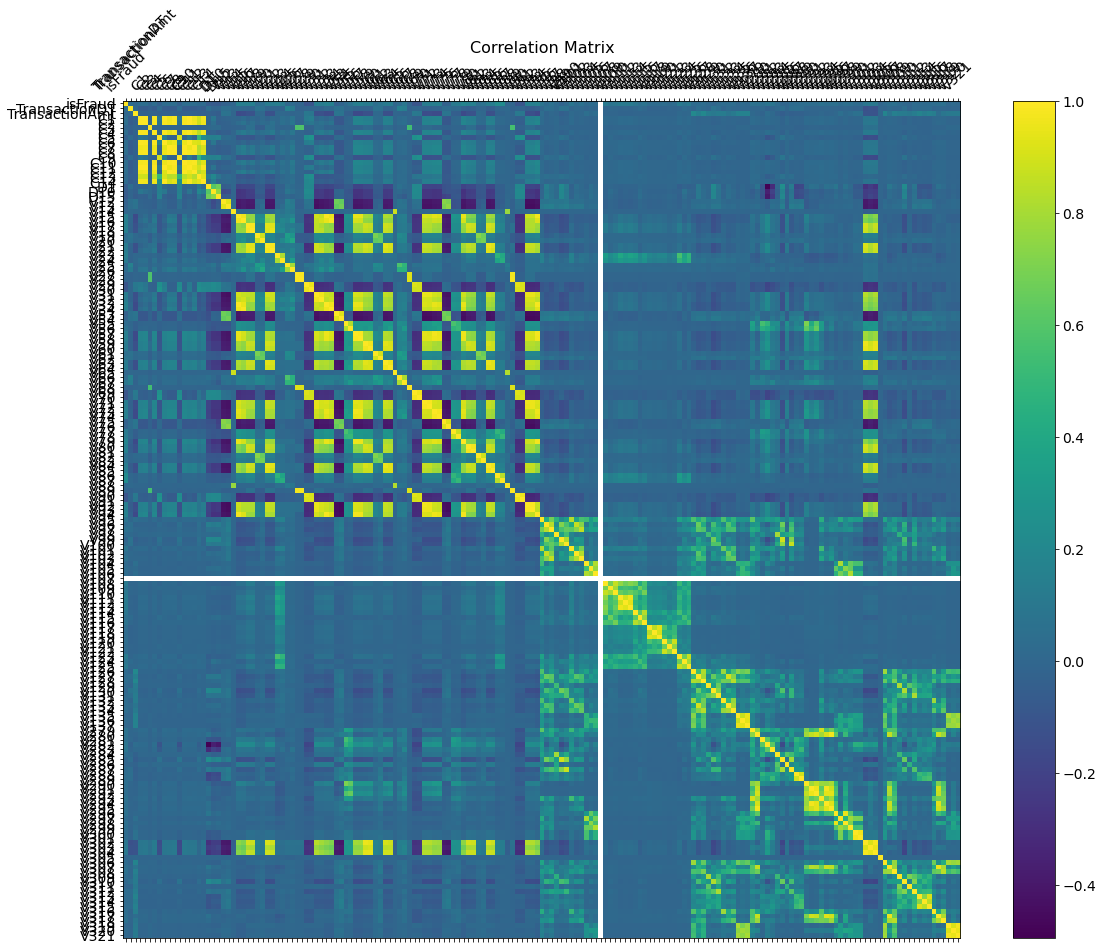

In [19]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(19, 15))
df=data
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

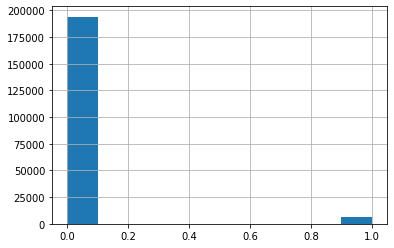

In [22]:
data['isFraud'].hist()

In [23]:
def plotHist(col, bins=20, figsize=(8,3)):
    with np.errstate(invalid='ignore'):
        plt.figure(figsize=figsize)
        plt.hist(data[col], bins=bins, density=True, color=['royalblue'])

In [24]:
data.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4',
       'card6', 'C1', 'C2', 'C3', 'C4',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=174)

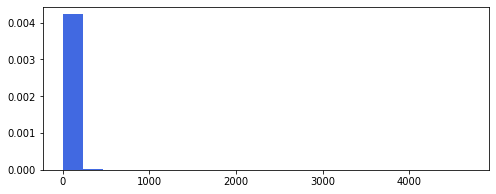

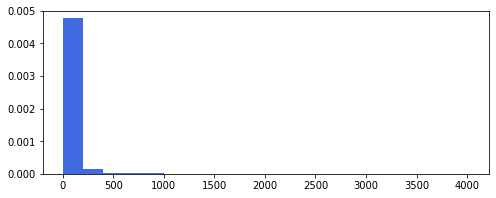

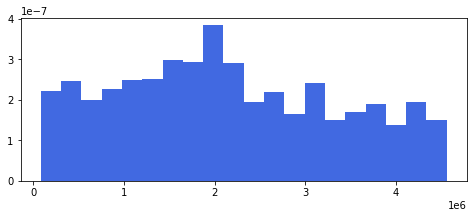

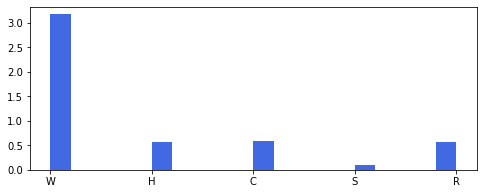

In [25]:
plotHist('C1')
# plotHistByFraud('card4')
plotHist('V312')
plotHist('TransactionDT')
plotHist('ProductCD')

### Create Indicator vector

In [26]:
import gc
def create_indicator(data):
  indicator = np.ones_like(data)
  nan_ind = np.where(data.isna())
  nan_ind[0].shape
  for i in range(nan_ind[0].shape[0]):
    row = nan_ind[0][i]
    column = nan_ind[1][i]
    indicator[row][column]=0
    gc.collect()
    return indicator


Divide data to train and test. Fill Nan values with zeros.

In [27]:
from sklearn.model_selection import train_test_split
data=pd.get_dummies(data,columns=cat_feat)
X_train, X_test, y_train, y_test = train_test_split( data.drop('isFraud',axis=1), data['isFraud'], test_size=0.2, random_state=42)

Transform categorical features

In [28]:

indicator_train=create_indicator(X_train)
indicator_test=create_indicator(X_test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train=X_train.fillna(0)
X_test=X_test.fillna(0)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [29]:
full_train = np.zeros((2,X_train.shape[0],X_train.shape[1]))
full_train[0]=X_train
full_train[1]=indicator_train
full_test = np.ndarray((2,X_test.shape[0],X_test.shape[1]))
full_test[0]=X_test
full_test[1]=indicator_test

# full_train[0]=full_train[0]/full_train[0].max(0)
# full_test[0]=full_test[0]/full_test[0].max(0)




In [30]:
del X_train
del X_test


In [31]:
del indicator_train
del indicator_test

In [32]:
del data

In [33]:

gc.collect()

250

In [34]:
full_train[0].shape[1]

183

### Start Torch

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


### Under complete autoencoder

In [36]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
## Undercomplete
class autoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
      super(autoencoder, self).__init__()
      # Step 1 : Define the encoder 
      # Step 2 : Define the decoder
      # Step 3 : Initialize the weights (optional)


      self.encoder = nn.Sequential(
          nn.Linear(input_size, input_size//2),
          nn.ReLU(True),
          nn.Linear(input_size//2, input_size//3),
          nn.Linear(input_size//3, input_size//4),
          nn.Tanh(),
          nn.Linear(input_size//4, latent_dim)
      )
    
      self.decoder = nn.Sequential(
          nn.Linear(latent_dim, input_size//4),
          nn.ReLU(True),
          nn.Linear(input_size//4, input_size//3),
          nn.Linear(input_size//3, input_size//2),
          nn.Tanh(),
          nn.Linear(input_size//2, input_size)
      )
        
      self.encoder.apply(self.__init_weights)
      self.decoder.apply(self.__init_weights)
        
    def forward(self, data):
      # Step 1: Pass the input through encoder to get latent representation
      # Step 2: Take latent representation and pass through decoder
      x=data[0]*data[1]  
      x = self.encoder(x)
      x = self.decoder(x)
      return x
        
        
    
    def encode(self,input):
      #Step 1: Pass the input through the encoder to get latent representation
      return self.encoder(input)
    
    def __init_weights(self,m):
      #Init the weights (optional)
      if type(m) == nn.Linear:
          torch.nn.init.xavier_uniform_(m.weight)
          m.bias.data.fill_(0.01)

In [37]:
batchSize = 500
learning_rate = 0.01
num_epochs = 50
input_size=full_train[0].shape[1]
latent_size=20
AE = autoencoder(input_size, latent_size).to(device)
print(AE)
# print(summary(AE,input_size=(1, 64)))

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(),lr = learning_rate)

#Create a random dataset
data_loader = DataLoader(TensorDataset(torch.from_numpy(full_train)),batch_size=batchSize,shuffle=True)
# del full_train

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=183, out_features=91, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=91, out_features=61, bias=True)
    (3): Linear(in_features=61, out_features=45, bias=True)
    (4): Tanh()
    (5): Linear(in_features=45, out_features=20, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=45, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=45, out_features=61, bias=True)
    (3): Linear(in_features=61, out_features=91, bias=True)
    (4): Tanh()
    (5): Linear(in_features=91, out_features=183, bias=True)
  )
)


In [38]:
losses=[]
for epoch in range(num_epochs):
  epoch_loss = 0.0
  batch_losses = []
  for X in data_loader:
    X = X[0].to(device)

    optimizer.zero_grad()
    # forward
    output = AE(X.float())
    loss = criterion(output*X.float()[1], X.float()[0])
    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
    batch_losses.append(loss.item())
      
  losses.append(np.mean(batch_losses))
  # log
  #print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))

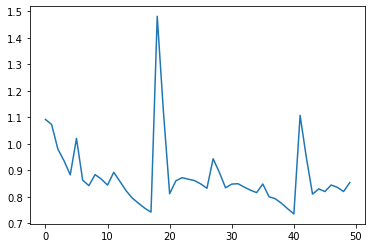

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)),losses)
plt.show()

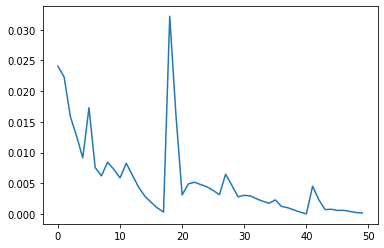

In [40]:
losses=(losses - min(losses)) / max(losses)
import matplotlib.pyplot as plt
plt.plot(losses * np.arange(0.1, 0, -0.1 / len(losses)))

In [41]:
gc.collect()

2577

## Denoising autoencoder

In [42]:
normal = torch.distributions.Normal(0, 0.5)

def add_noise(x, device=device): 
    return x + normal.sample(sample_shape=torch.Size(x.shape)).to(device)

In [43]:
batchSize = 50
learning_rate = 0.01
num_epochs = 50
input_size=full_train[0].shape[1]
latent_size=20
DAE = autoencoder(input_size, latent_size).to(device)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(),lr = learning_rate)

#Create a random dataset
data_loader = DataLoader(TensorDataset(torch.from_numpy(full_train)),batch_size=batchSize,shuffle=True)
# del full_train

In [44]:
losses=[]
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in data_loader:
    X = add_noise(X[0]).to(device)
    
    optimizer.zero_grad()
    # forward
    output = DAE(X.float())
    loss = criterion(output*X.float()[1], X.float()[0])
    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
    
  losses.append(epoch_loss)
  # log
  #print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))

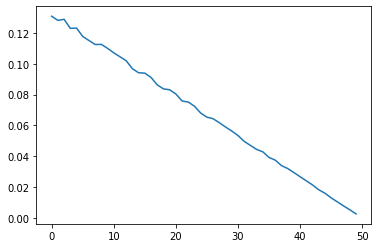

In [45]:
plt.plot(losses * np.arange(0.1, 0, -0.1 / len(losses)))

## Variational autoencoder

In [46]:
import torch.nn.functional as F

In [47]:
# Hyper-parameters



batchSize = 50
learning_rate = 0.01
num_epochs = 50
input_size=full_train[0].shape[1]
z_dim=20


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(),lr = learning_rate)
full_train[0]=np.abs(full_train[0])/np.max(full_train[0])
full_test[0]=np.abs(full_test[0])/np.max(full_test[0])
# print(full_train.shape)
# print(np.max(full_train))
#Create a random dataset
data_loader = DataLoader(TensorDataset(torch.from_numpy(full_train)),batch_size=batchSize,shuffle=True)



In [48]:
# VAE model
class VAE(nn.Module):
    def __init__(self, input_size=input_size, h_dim=400, z_dim=z_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, input_size)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return F.sigmoid(self.fc5(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x[0]*x[1])
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [49]:
# Start training
losses_vae=[]
for epoch in range(num_epochs):
    for i, X in enumerate(data_loader):
        # Forward pass
        X = X[0].to(device)
        output, mu, log_var = model(X.float())
        
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(output*X.float()[1], X.float()[0], size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 50 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))

        losses_vae.append(reconst_loss.item())
    # with torch.no_grad():
    #     # Save the sampled images
    #     z = torch.randn(batch_size, z_dim).to(device)
    #     out = model.decode(z).view(-1, 1, 28, 28)
    #     save_image(out,'./sampled-{}.png'.format(epoch+1))

    #     # Save the reconstructed images
    #     out, _, _ = model(x)
    #     x_concat = torch.cat([x.view(-1, 1, 28, 28), out.view(-1, 1, 28, 28)], dim=3)
    #     save_image(x_concat, './reconst-{}.png'.format(epoch+1))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


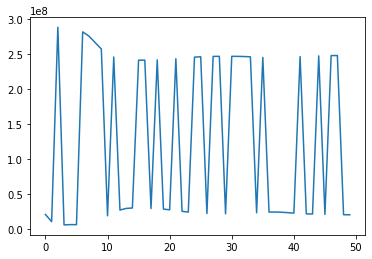

In [50]:
plt.plot(range(len(losses_vae)),losses_vae)

In [51]:
full_train.shape

(2, 160000, 183)

In [52]:
temp_test=torch.from_numpy(full_test)
temp_test = temp_test.to(device)

temp_train=torch.from_numpy(full_train)
temp_train = temp_train.to(device)

output_test = AE(temp_test.float())
output_train= AE(temp_train.float())

del temp_test
del temp_train
output_train=output_train.detach().numpy()
output_test=output_test.detach().numpy()

Replace Nan values in the data. 
$$ X=X+(1-indicator)*X $$

In [53]:
reversed_indicator_train = np.ones_like(full_train[1])-full_train[1]
reversed_indicator_test = np.ones_like(full_test[1])-full_test[1]

output_train=full_train[0]*full_train[1]+output_train*reversed_indicator_train
output_test=full_test[0]*full_test[1]+output_test*reversed_indicator_test

In [54]:
pip install imblearn

ERROR: Operation cancelled by user


### Compare performance with and without autoencoders using Imbalanced learn

In [55]:
#without autoencders

from sklearn.metrics import classification_report

from imblearn.ensemble import BalancedRandomForestClassifier 
train=full_train[0]
test=full_test[0]

y_train=np.array(y_train)

def brfmodel(train,test,y_train,y_test):
  model1 = BalancedRandomForestClassifier(n_estimators = 50,
                                              max_depth=7,
                                              min_samples_split = 3,
                                              min_samples_leaf=1)
  model1.fit(train,y_train)

  print(classification_report(y_test,model1.predict(test)))



In [56]:
brfmodel(train,test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     38828
           1       0.10      0.40      0.15      1172

    accuracy                           0.87     40000
   macro avg       0.54      0.64      0.54     40000
weighted avg       0.95      0.87      0.91     40000



In [57]:
#with Autoencoders


brfmodel(output_train,output_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     38828
           1       0.09      0.41      0.15      1172

    accuracy                           0.87     40000
   macro avg       0.54      0.64      0.54     40000
weighted avg       0.95      0.87      0.91     40000



### PCA and LDA

Reduce the dimenssion of the data using Principal component analysis and Linear Discriminant Analysis and compare the impact on selected machine learning model

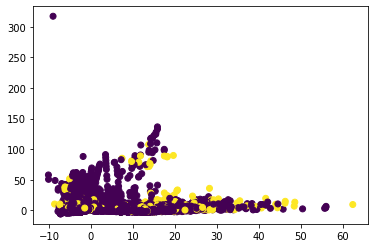

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = full_train[0]

y = y_train

scaler = StandardScaler()

X_s=scaler.fit_transform(X)

pca = PCA()
X_r=pca.fit_transform(X_s)

#print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

plt.scatter( X_r[:,0], X_r[:,1], c=y )




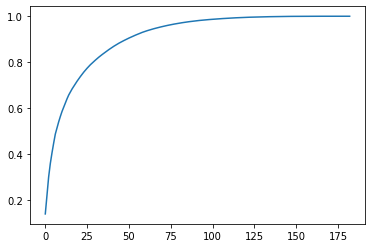

In [59]:
plt.plot(range(X_r.shape[1]), pca.explained_variance_ratio_.cumsum())

### PCA

In [60]:
train=full_train[0]
test=full_test[0]

scaler = StandardScaler()

X_pca=scaler.fit_transform(train)
X_test_pca=scaler.transform(test)
pca = PCA(75)

X_pca=pca.fit_transform(X)
X_test_pca=pca.transform(X_test_pca)



In [61]:
brfmodel(X_pca,X_test_pca,y_train,y_test)

              precision    recall  f1-score   support

           0       0.97      0.23      0.37     38828
           1       0.03      0.77      0.06      1172

    accuracy                           0.24     40000
   macro avg       0.50      0.50      0.21     40000
weighted avg       0.94      0.24      0.36     40000



In [62]:
gc.collect()

98

In [63]:
train=full_train[0]
test=full_test[0]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

scaler = StandardScaler()

X_lda=scaler.fit_transform(train)
X_test_lda=scaler.transform(test)


X_lda = lda.fit_transform(X_lda,y_train)
X_test_lda=lda.transform(X_test_lda)


In [64]:
brfmodel(X_lda, X_test_lda, y_train,y_test)

              precision    recall  f1-score   support

           0       0.99      0.00      0.01     38828
           1       0.03      1.00      0.06      1172

    accuracy                           0.03     40000
   macro avg       0.51      0.50      0.03     40000
weighted avg       0.97      0.03      0.01     40000



We can see that both PCA and LDA gives almost the same result, but after reducing dimensionality with LDA we get worse metrics. It's due to the fact that in LDA we use only 1 component, because number of components in LDA shoukd be less than min(n_feature,n_classes-1). 